In [1]:
# Determine if running in Google Colab
try:
    import google.colab
    from google.colab import drive
    drive.mount('/content/drive')
    ROOT_DIR = '/content/drive/MyDrive'
    COLAB = True
except:
    ROOT_DIR = '..'
    COLAB = False

In [2]:
def get_path(relative_path):
    return '{}/{}'.format(ROOT_DIR, relative_path)


def summarize_df(df):
    display(df.head())
    print('Number of rows: {}'.format(len(df)))

In [3]:
if COLAB:
    !pip install geopandas

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import json
import urllib
import urllib.request

# spatial join

In [5]:
st = pd.read_csv(get_path('data/exports/stations_san_francisco.csv'))
summarize_df(st)

,station_id,lat,lng
0,SF-M26,37.767088,-122.407380
1,SF-M25,37.767100,-122.410662
2,SF-M26-2,37.768568,-122.404238
3,SF-L26,37.769257,-122.407029
4,SF-L25,37.770037,-122.411798


Number of rows: 253


In [6]:
dem = gpd.read_file(get_path('data/shapefiles/dem/SF_final_DEM.shp'))
summarize_df(dem)

,DN,geometry
0,1,"POLYGON ((-122.37285 37.83322, -122.37276 37.8..."
1,1,"POLYGON ((-122.37294 37.83313, -122.37285 37.8..."
2,1,"POLYGON ((-122.37303 37.83304, -122.37294 37.8..."
3,2,"POLYGON ((-122.37312 37.83295, -122.37303 37.8..."
4,1,"POLYGON ((-122.37321 37.83286, -122.37312 37.8..."


Number of rows: 218071


In [7]:
geometry = gpd.points_from_xy(st.lng, st.lat)
gdf_dt = gpd.GeoDataFrame(st, geometry=geometry).set_crs('EPSG:4326')
gdf_dt.head()

,station_id,lat,lng,geometry
0,SF-M26,37.767088,-122.407380,POINT (-122.40738 37.76709)
1,SF-M25,37.767100,-122.410662,POINT (-122.41066 37.76710)
2,SF-M26-2,37.768568,-122.404238,POINT (-122.40424 37.76857)
3,SF-L26,37.769257,-122.407029,POINT (-122.40703 37.76926)
4,SF-L25,37.770037,-122.411798,POINT (-122.41180 37.77004)


<AxesSubplot:>

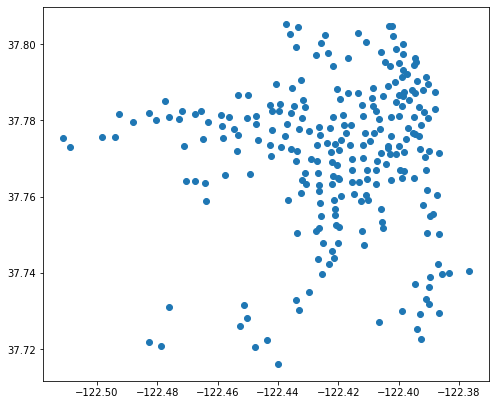

In [8]:
gdf_dt.plot(figsize=(8,8))

In [9]:
gdf_dt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
dem.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
dt_join2 = gpd.sjoin(gdf_dt, dem, op='within')
summarize_df(dt_join2)

,station_id,lat,lng,geometry,index_right,DN
0,SF-M26,37.767088,-122.407380,POINT (-122.40738 37.76709),64457,12
1,SF-M25,37.767100,-122.410662,POINT (-122.41066 37.76710),64694,15
2,SF-M26-2,37.768568,-122.404238,POINT (-122.40424 37.76857),84409,4
5,SF-L27,37.771075,-122.402732,POINT (-122.40273 37.77108),84409,4
6,SF-K26,37.771461,-122.405788,POINT (-122.40579 37.77146),84409,4


Number of rows: 253


In [12]:
dt_join2 = dt_join2[dt_join2['station_id'].notnull()]
dt_join2_csv = dt_join2[['station_id', 'lat', 'lng', 'DN']].copy()
dt_join2_csv.rename(columns={'DN': 'elevation'}, inplace=True)
dt_join2_csv.to_csv(get_path('data/exports/SF_ele_single station.csv'), index=False)